# Preparing for disasters: Understanding mental health effects of emergency situations through the requirements imposed to support systems

## Authors

# This notebook is prepared to be used as complementary material to the article of the same name

It is structured in a way that each section presents a small introduction, the summary and most important results of the section, and the coding or analysis that was associated. Most of the calculations are retrieved through other scripts to have a clean presentation of the results, but they can be provided under request.

# 0:  Packages and modules

In [1]:
import csv
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from mpl_toolkits import mplot3d
import sklearn.metrics
from sklearn.decomposition import PCA
import modules as md

## Parsing

We are identifying trends of psychological changes and societal behaviors in smaller time frames.

In [2]:
%run parsing.py

## Vectors refer to symptoms reported by users in the questionnaire "Screening tool for mental health problems"

The vectors were selected to represent the main features involved in the need for mental health support and/or are closely related to the questions evaluated in the PCL-5 PTSD evaluation tool. 

- Anxiety questions: 54, 55, 56, 57, 67, 68.
- Stress questions: 37, 38, 39, 40, 44, 48, 53.
- Avoidance questions: 41, 42, 43.
- Information Seeking question: 64.
- Distancing questions: 45, 46, 49, 50, 51.
- Somatization question: 62.

## Vectors refer to the support mental health service behavior ("Lifeline service")

The vectors selected from the "lifeline phone service" were the next ones:

- Enterqueue
- Connected calls
- Abandoned call attempts
- Waiting time before abandoning
- Waiting time before connection
- Call duration

# 1. Data description 

## 1.1 Objective

The objective of the present study is to analyze the results of interactions with first-level mental health services in Mexico City, using high-resolution time scale data (day-by-day) for short periods (+- 72 hours) under two scenarios: the COVID-19 pandemic (13/04/2020 - 07/12/2020) and earthquakes with early warnings (13/04/2020 - 10/04/2023), looking to identify significant changes in the mental health sphere possibly triggered by different types of events (public announcements, start of pandemic measures, mental health promotion, festivities, and earthquakes with early warnings).

The database of the "Screening tool for mental health problems" is comprised of the responses of 36,552 users to 23 questions for 240 straight days in 2020.

- Events (Triggers) = Dates in which public announcements, the start of pandemic measures, mental health promotion, festivities, and earthquakes with early warnings happened.
- Dependent variable = Amount of uses of services. 
- Independent variables = Symptoms (Anxiety, stress, avoidance, distancing, somatization.), events.

Meanwhile, the "Lifeline phone service" records 348,824 calls over 280 (nonconsecutive) days covering the time periods associated with the events analyzed.

- Events (Triggers) = Dates in which public announcements, the start of pandemic measures, mental health promotion, festivities, and earthquakes with early warnings happened. 


## 1.2 "Screening tool for mental health problems description"

### 1.2.1 Time distribution "Screening tool for mental health problems"

The usage distribution of the "Screening tool for mental health problems" over time (240 days of the sample) can be seen on the following histogram, showing substantial changes in the usage of the Screening tool for mental health problems over certain days, suggesting that something triggered the response.

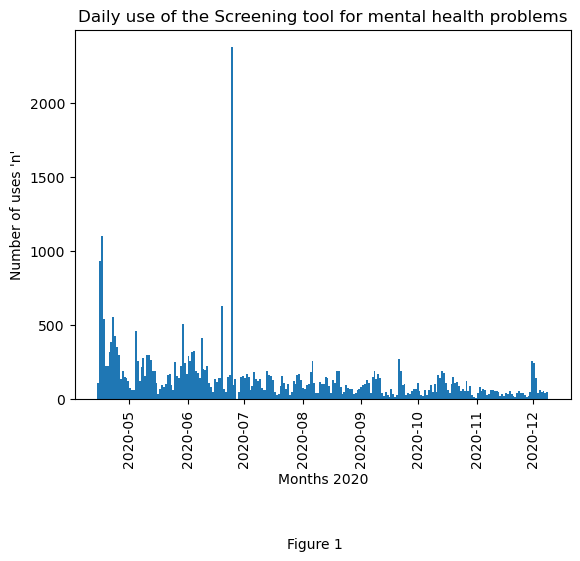

In [3]:
%run tamizaje_hist.py

### 1.2.2 General distribution of "Screening tool for mental health problems" sample

The dispersion of the different symptoms suggests that the events trigger different effects related to mental health.    

<center><b>General dispersion by symptom cluster</b></center>

|Measure | Anxiety | Stress | Avoidance | Distancing | Information seeking | Somatization |
| :-----: | :-----: |:-----: |:-----: | :-----: | :-----: |:-----: |
| Min     | 0.0     |  0.0   | 0.0    |  0.0    | 0.0     |  0.0   |
| Max     | 4.0     |  4.0    |  4.0   | 4.0     |  4.0    | 4.0    |
| Range   | 4.0     |  4.0   |  4.0   | 4.0     | 4.0     | 4.0    |
| 25th Percentile | 0.0  |  0.0  | 0.0  |  0.0 | 0.0  |  0.0 |
| 75th Percentile | 3.0  |  3.0  | 2.0 | 3.0 | 1.0 | 0.0 |
| Inter-quartile range | 3.0  |  3.0  | 3.0 | 1.0 | 0.0 | 0.0 |
| Variance | 2.6  | 2.3  |  1.8 | 2.5 | 1.2 | 1.3 |
| Standard deviation |  1.6 |  1.5  | 1.3 | 1.6 | 1.1 | 1.1 |

<center><b>Table 1</b></center>

### 1.2.3 Distribution of symptoms

A general analysis using histograms of the behavior of the type of responses for all items grouped by class of symptoms reveals that only in a small percentage of cases are acute symptoms present, anxiety being the leading one.

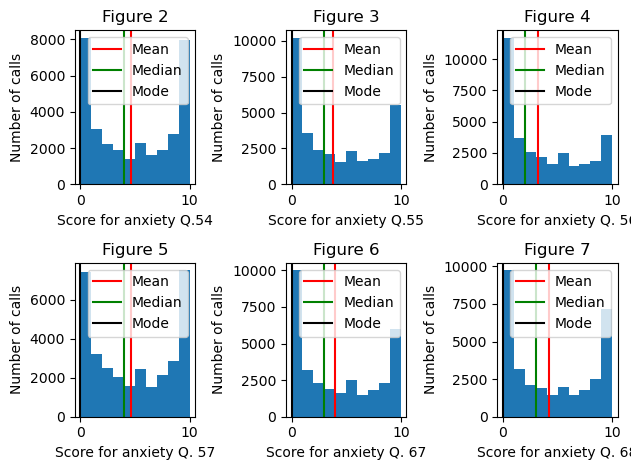

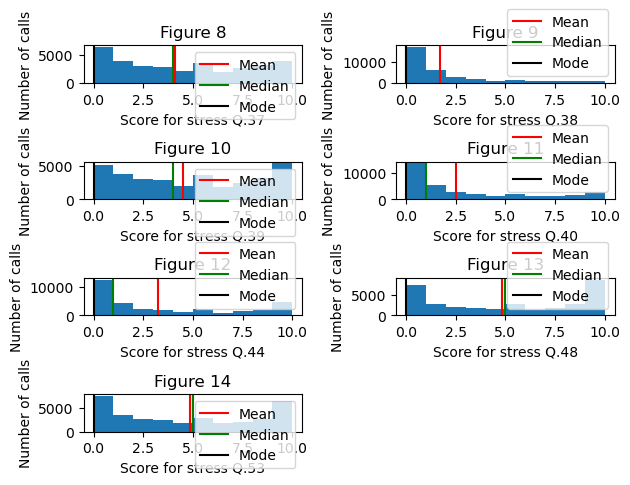

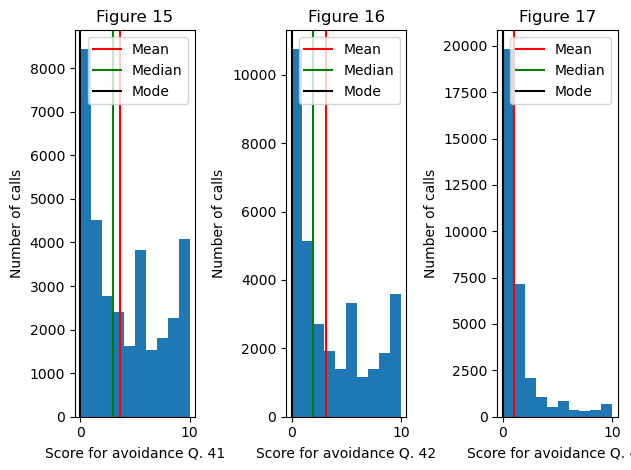

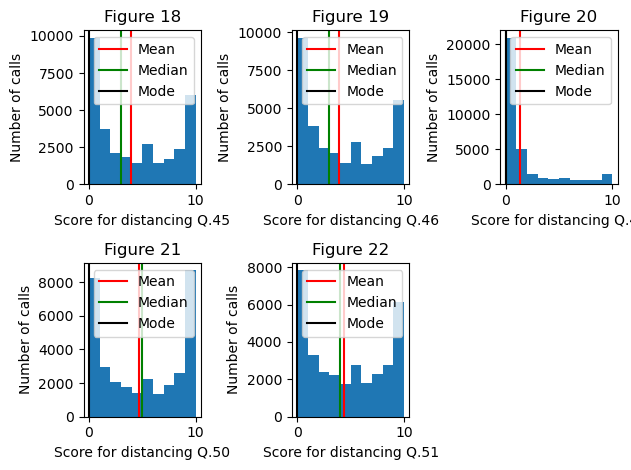

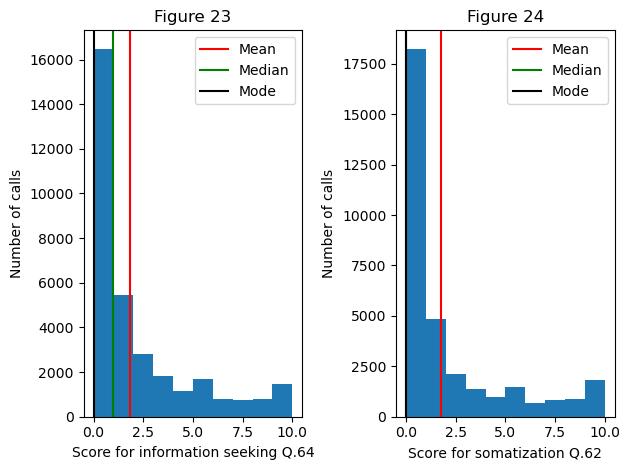

In [4]:
%run distribution_anx.py
%run distribution_str.py
%run distribution_avo.py
%run distribution_dis.py
%run distribution_mix.py

## 1.3 "Lifeline service"

### 1.3.1 Time distribution "Lifeline service"

The sample distribution of the "Lifeline service" consists of time frames. The first covers from 24/5/2020 - 31/12/2020 and then -72 hours + 72 hours surrounding earthquake events for 2021, 2022, and up to 6/04/2023. A scatterplot covering the 280 days of the sample allows us to see the general distribution of the sample.

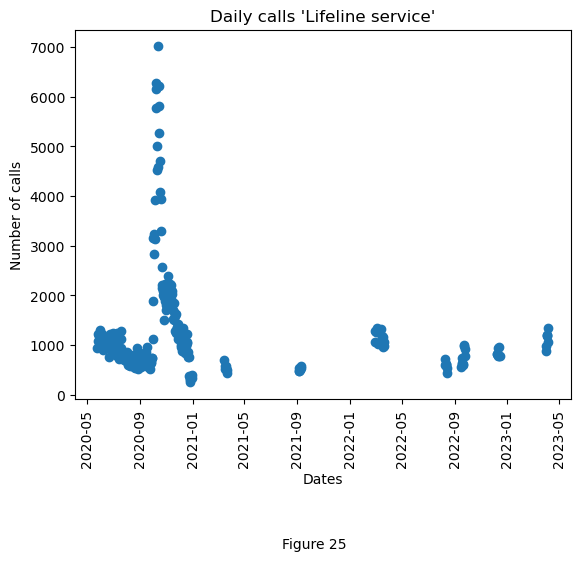

In [5]:
%run lifeline_scatter.py

### 1.3.2 General distribution of "Lifeline service" sample

The sample shows high levels of variance between its elements.

<center><b>General dispersion on lifeline service vectors</b></center>



|Measure	| Enterqueue (n)	| Connected (n)	| Abandoned	(n)|Time before connexion (seconds)	|Time before abandoning	(seconds)|Call duration (seconds)|
| :-----: | :-----: |:-----: |:-----: | :-----: | :-----: |:-----: |
|Min	|248	|200	|10	|0.6	|12.5	|151.5|
|Max	|7010	|1748|	5712|	392.8|	1212.5	|1273|
|Range	|6762	|1548	|5702	|392.2	|1200	|1121.5|
|25th Percentile |	692	|520	|85.5	|9.6	|71.1	|339.7|
|75th Percentile	|1255	|935	|502.5	|61	|118.2	|506.4|
|Inter-quartile range	|563	|415	|417	|51.5	|47.1	|166.7|
|Variance	|1143865.6	|82682.8	|854705	|4850.4	|7210.7	|32120.5|
|Standard deviation|	1069.5	|287.5	|924.5	|69.6	|84.9	|179.2|

<center><b>Table 2</b></center>

### 1.3.3 Distribution of lifeline vectors.

A general analysis using histograms of the behavior of the lifeline service regarding the calls received, attended, waiting times and call duration shows that their distributions are generally skewed toward smaller values.

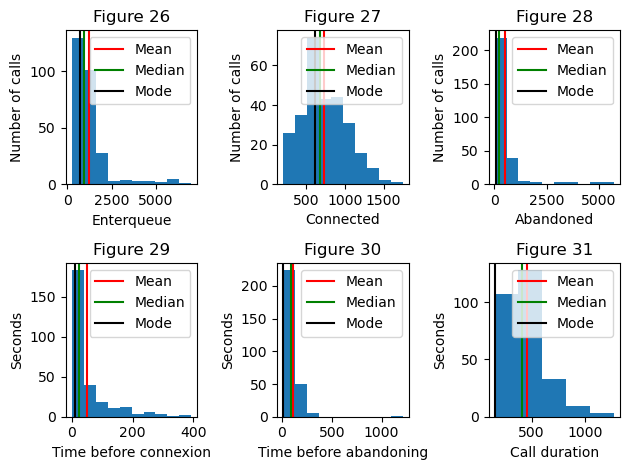

In [6]:
%run distribution_ll.py

# 2. Hypothesis testing

The statistical tests performed on the samples evaluate the changes in their elements surrounding dates associated with significant events. 

## Time separations

The time ranges correspond to the +- 72 hours window surrounding public announcements, the start of pandemic measures, mental health promotion, festivities, and earthquakes, with early warnings identified as possible significant elements in regard to risk management.

Public announcements of changes in policy or status quo:

- February 27.- The first case of COVID-19 is registered in Mexico. 
- February 28.- Phase 1 corresponds to WHO´s sporadic cases scenario (countries/ territories/ areas with one or more cases, imported or locally detected  of the national response is implemented.
- March 23.- Beginning the healthy distance plan (sanitary measures to lower contagious rate starts) Phase 2 corresponds to WHO´s clusters of cases scenario (when a country experiences cases clustered in time, geographic location, and/or by everyday exposure). 
- April 16.- News about the high increase in COVID-19 cases.
- April 21.- Declaratory of emergency Phase 3 corresponds to the WHO´s community transmission scenario when a country experiences more significant outbreaks of local transmission and suspension of non-essential activities.
- May 13.- Announcement of the plan to return to a "new normality."
- June 1.- Start of the epidemiological risk traffic light.
- June 28.- Epidemiological traffic lights change from red to orange in Mexico City. Return to non-essential activities with a staff capacity of 30%.
 - June 29, 2020, to May 6, 2021.- Orange traffic light of epidemiological vigilance in Mexico City.
- July 1, 2020.- First day of the return to a “new normality.”

Dates of announcements related to mechanisms for taking care of stress and mental burden:

- April 10 and 26, 2020.- COVID-19 Conference: information on mental health issues.
- July 27, 2020.- COVID-19 Conference: information on mental health issues.
- September 20, 2020.- COVID-19 Conference: information on mental health issues.
- November 26, 2020.- COVID-19 Conference: information on mental health issues.

Festivities:

- May 10.- Mother's Day.
- September 16.- Independence Day.
- December 24 and 25.- Christmas Eve and Christmas Day.

Earthquake early-warning activation dates:

Mexican agencies classify earthquakes as follows: Heavy Earthquakes: magnitude >= 7.0; medium Earthquakes: magnitude >= 6.0; light Earthquakes: magnitude >= 5.0.
    
- June 23, 2020.- Public alert because of a very strong earthquake.
- March 19, 2021.- Public alert because of a light earthquake.
- September 7, 2021.- Public alert because of a very strong earthquake.
- March 3, 2022.- Public alert because of a light earthquake.
- March 18, 2022.- Public alert because of a light earthquake.
- August 12, 2022.- Public alert because of a light earthquake. 
- September 19, 2022.- Public alert because of a very strong earthquake.
- September 22, 2022.- Public alert because of a strong earthquake.
- December 11, 2022.- Public alert because of a moderate earthquake.
- April 3, 2023.- Public alert because of a moderate earthquake.

In [7]:
%run Time_ranges.py

# 2.1 Method for hypothesis testing "Screening tool for mental health problems"

- The database was sliced separating the -72 hours window before the event date and the +72 hours window after the event date. The event day is excluded from the analysis.
- One-way ANOVA tests were performed to evaluate if there were statistically significant changes in the timeframes (pre and post) for every symptom question.
- A contingency analysis was performed to evaluate if a statistically significant change happened in the way in which the answers were provided. 
- A comparison between the rate of use of the questionnaire pre and post-event was performed to evaluate the impact of the event on the general use of the tool. 

### 2.1.1 Principal Component Analysis

To evaluate the relationship between the symptom dimensions, a principal component analysis was performed on the 23 vectors corresponding to the selected questions of the questionnaire due to their relationship with the PTSD criteria supported in the PCL-5 evaluation tool.

The PCA analysis suggests that the "anxiety dimension" in its first component explains half of the variance of the data sample (more than 50%). At the same time, a more regular distribution happens between the rest of the 22 components.

This means that anxiety is mostly related to changes in symptom behaviors.

In [8]:
%run pca_analysis.py

PCA(n_components=23)

First PC  : [0.28043659 0.26610656 0.23062862 0.27176891 0.24948596 0.27242798
 0.19393531 0.13280132 0.20663629 0.18471818 0.193139   0.25191954
 0.22928044 0.15917698 0.12335534 0.05505497 0.24479137 0.21816241
 0.11376066 0.23889128 0.23693371 0.13246864 0.08266654]
Second PC : [ 0.07490002  0.13366103  0.12161744  0.17159398  0.29157318  0.27818821
 -0.29408288 -0.15912113 -0.32721514 -0.25941568 -0.24549075 -0.06601381
 -0.33746328 -0.2726009  -0.27435913 -0.07539334  0.18442592  0.07630189
  0.14220903  0.15562201  0.19747526 -0.12420103 -0.10603334]
3 PC      : [-0.0896532  -0.04995135 -0.05344407 -0.05261792  0.08709446  0.02042764
 -0.20920985 -0.08542638 -0.12957406 -0.11632126 -0.14453401 -0.00982939
 -0.18586656  0.53613272  0.65450967  0.09109978  0.13019993  0.18181186
  0.04472206 -0.02776142  0.02371634 -0.14391936 -0.20185638]
4 PC      : [ 0.26706357  0.19091339  0.24562525  0.24853973 -0.20017536 -0.05768233
 -0.02355474 -0.02225901  0.04478174 

## 2.1.2 One-way ANOVA

One-way ANOVA tests were conducted on the symptom questions to evaluate if significant changes happened between pre and post-event groups for each selected event.

The results showed the following:

- The news about the spreading of the pandemic (Announcement 1) triggered significant changes in some of the items of stress (Q. 39 and 53) and in one of the items of distancing (Q. 49).
- The start of measures (Measures 1) triggered significative changes in the anxiety dimension (Q. 55, 57, and 68), stress (Q. 38), and distancing (Q. 45, 49, 50, and 51).
- Significative changes are seen in anxiety (all questions), stress (Q. 39, 48, and 53), and distancing (all questions) around the time when the first mental health promotion event (Promotion 1) was made, probably as an effect of the start of the lockdown measures five days before.
- There were significative changes in stress (Q. 40) and in avoidance (Q. 41 and 42) surrounding the Mother's Day festivity (Festivity 1).
- The announcement plan to return to a "New normality" (Announcement 2) showed significant changes in the stress (Q. 39, 40, 48, and 53) and in the distancing (Q. 50) dimensions.
- The experience of a very strong earthquake triggered significant changes in anxiety (all questions), stress (Q. 37, 39, 44, 48, and 53), avoidance (41 and 43), and distancing (all questions).
- Significative changes are seen in anxiety (Q. 55 and 68), stress (Q. 37 and 39), distancing (Q. 51), and information seeking (Q. 64) around the time when the third mental health promotion event (Promotion 1) was made, a couple of days after the Independence day (Festivity 2).

According to the number of elements with significant changes, the impactful events were:

- The start of measures associated with the emergency declaration phase 3.
- The first public announcement of the mental health support strategy.
- The experience of the very strong Earthquake.



<center><b>One way ANOVA analysis per event dates</b></center>

|Questions| Announcement 1 F-oneway | Announcement 1 P-value | Measures 1 F-oneway | Measures 1 P-value | Promotion 1 F-oneway| Promotion 1 P-value |Festivities 1 F-oneway| Festivities 1 P-value | Announcement 2 F-oneway| Announcement 2 P-value |Measures 2 F-oneway | Measures 2 P-value |Earthquake very strong 1 F-oneway | Earthquake very strong 1 P-value |Announcement 3 F-oneway| Announcement 3 P-value |Measures 3 F-oneway | Measures 3 P-value |Promotion 2 F-oneway| Promotion 2 P-value |Festivities 2 F-oneway| Festivities 2 P-value |Promotion 3 F-oneway| Promotion 3 P-value |Promotion 4 F-oneway| Promotion 4 P-value | 
| :-----: | :-----: |:-----: | :-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |
|	Anxiety Q.54	|	0.016	|	0.9	|	2.358	|	0.125	|	14.239	|	0.001*	|	0.622	|	0.43	|	3.357	|	0.067	|	0.014	|	1.000	|	54.595	|	0.001*	|	0.025	|	1.000	|	0.007	|	1.000	|	1.252	|	0.264	|	0.266	|	0.607	|	0.665	|	0.415	|	0.319	|	0.573	|
|	Anxiety Q.55	|	0.297	|	0.586	|	6.897	|	0.009	|	1.06E+01	|	1.00E-03	|	2.011	|	0.156	|	0.933	|	0.334	|	0.006	|	1.000	|	38.368	|	0.001*	|	0.018	|	1.000	|	0.007	|	1.000	|	0.095	|	0.757	|	0.907	|	0.342	|	3.864	|	0.05	|	0.228	|	0.633	|
|	Anxiety Q.56	|	3.376	|	0.066	|	3.271	|	0.071	|	1.05E+01	|	1.00E-03	|	2.204	|	0.138	|	0.37	|	0.543	|	0.006	|	1.000	|	25.9	|	0.001*	|	0.032	|	1.000	|	0.008	|	1.000	|	1.412	|	0.235	|	0.013	|	0.91	|	3.076	|	0.08	|	0.072	|	0.789	|
|	Anxiety Q.57	|	1.67	|	0.196	|	6.488	|	0.011	|	14.348	|	0.001*	|	0.531	|	0.466	|	0.583	|	0.445	|	0.012	|	1.000	|	59.566	|	0.001*	|	0.014	|	1.000	|	0.002	|	1.000	|	0.041	|	0.84	|	0.258	|	0.612	|	2.991	|	0.084	|	0.342	|	0.559	|
|	Anxiety Q.67	|	0.221	|	0.638	|	3.408	|	0.065	|	1.20E+01	|	1.00E-03	|	2.476	|	0.116	|	2.608	|	0.107	|	0.018	|	1.000	|	39.599	|	0.001*	|	0.014	|	1.000	|	0.005	|	1.000	|	0.003	|	0.955	|	1.177	|	0.279	|	1.34	|	0.247	|	0.025	|	0.875	|
|	Anxiety Q.68	|	0.177	|	0.674	|	9.34E+00	|	2.00E-03	|	9.77E+00	|	2.00E-03	|	1.491	|	0.222	|	3.332	|	0.068	|	0.019	|	1.000	|	56.714	|	0.001*	|	0.034	|	1.000	|	0.002	|	1.000	|	0.006	|	0.94	|	1.461	|	0.228	|	3.883	|	0.049	|	0.033	|	0.857	|
|	Stress Q.37	|	1.229	|	0.268	|	2.543	|	0.111	|	4.606	|	0.032	|	1.192	|	0.275	|	3.325	|	0.068	|	0.025	|	1.000	|	6.182	|	0.013	|	0.012	|	1.000	|	0.008	|	1.000	|	1.054	|	0.305	|	1.717	|	0.191	|	8.26E+00	|	4.00E-03	|	0.483	|	0.488	|
|	Stress Q.38	|	0.73	|	0.393	|	4.026	|	0.045	|	0.019	|	0.889	|	0.174	|	0.677	|	0.516	|	0.473	|	0.002	|	1.000	|	0.255	|	0.614	|	0.034	|	1.000	|	0.022	|	1.000	|	0.053	|	0.817	|	0.024	|	0.877	|	0.74	|	0.39	|	0.011	|	0.917	|
|	Stress Q.39	|	5.101	|	0.024	|	0.001	|	0.979	|	4.174	|	0.041	|	0.452	|	0.501	|	8.62E+00	|	3.00E-03	|	0.009	|	1.000	|	29.824	|	0.001*	|	0.080	|	0.999	|	0.014	|	1.000	|	0.121	|	0.728	|	0.116	|	0.733	|	3.991	|	0.046	|	0.068	|	0.794	|
|	Stress Q.40	|	0.296	|	0.586	|	2.375	|	0.123	|	0.243	|	0.622	|	5.86	|	0.016	|	4.797	|	0.029	|	0.007	|	1.000	|	3.277	|	0.07	|	0.003	|	1.000	|	0.017	|	1.000	|	1.757	|	0.186	|	1.172	|	0.28	|	1.331	|	0.249	|	2.357	|	0.126	|
|	Stress Q.44	|	2.678	|	0.102	|	0.001	|	0.97	|	2.955	|	0.086	|	1.993	|	0.158	|	3.63	|	0.057	|	0.003	|	1.000	|	6.812	|	0.009	|	0.007	|	1.000	|	0.010	|	1.000	|	1.016	|	0.314	|	1.552	|	0.214	|	2.674	|	0.102	|	0.857	|	0.355	|
|	Stress Q.48	|	1.04	|	0.308	|	1.465	|	0.226	|	9.03E+00	|	3.00E-03	|	3.602	|	0.058	|	6.823	|	0.009	|	0.016	|	1.000	|	43.939	|	0.001*	|	0.012	|	1.000	|	0.009	|	1.000	|	0.493	|	0.483	|	0.015	|	0.904	|	1.169	|	0.28	|	0.202	|	0.653	|
|	Stress Q.53	|	4.913	|	0.027	|	0.459	|	0.498	|	4.232	|	0.04	|	1.137	|	0.286	|	4.72	|	0.03	|	0.011	|	1.000	|	16.951	|	0.001*	|	0.050	|	1.000	|	0.011	|	1.000	|	0.444	|	0.506	|	1.108	|	0.294	|	2.752	|	0.098	|	1.425	|	0.234	|
|	Avoidance Q.41	|	0.143	|	0.706	|	0.008	|	0.927	|	3.076	|	0.08	|	4.109	|	0.043	|	0.197	|	0.657	|	0.008	|	1.000	|	4.561	|	0.033	|	0.016	|	1.000	|	0.007	|	1.000	|	0.003	|	0.955	|	0.109	|	0.741	|	0.036	|	0.85	|	0.057	|	0.812	|
|	Avoidance Q.42	|	0.813	|	0.367	|	0.005	|	0.941	|	0.069	|	0.793	|	8.41E+00	|	4.00E-03	|	0.219	|	0.64	|	0.005	|	1.000	|	1.863	|	0.172	|	0.011	|	1.000	|	0.007	|	1.000	|	0.013	|	0.91	|	0.669	|	0.414	|	3.18	|	0.075	|	1.834	|	0.177	|
|	Avoidance Q.43	|	0.065	|	0.799	|	2.973	|	0.085	|	1.788	|	0.181	|	1.325	|	0.25	|	1.942	|	0.164	|	0.002	|	1.000	|	1.01E+01	|	1.00E-03	|	0.024	|	1.000	|	0.011	|	1.000	|	0.001	|	0.982	|	0.093	|	0.761	|	0.209	|	0.648	|	0.0002	|	0.988	|
|	Distancing Q.45	|	0.071	|	0.789	|	6.938	|	0.009	|	7.1	|	0.008	|	2.019	|	0.156	|	0.777	|	0.378	|	0.006	|	1.000	|	30.25	|	0.001*	|	0.035	|	1.000	|	0.006	|	1.000	|	0.229	|	0.632	|	0.003	|	0.955	|	0.926	|	0.336	|	0.018	|	0.893	|
|	Distancing Q.46	|	1.371	|	0.242	|	3.156	|	0.076	|	4.517	|	0.034	|	3.412	|	0.065	|	1.796	|	0.18	|	0.002	|	1.000	|	4.403	|	0.036	|	0.014	|	1.000	|	0.008	|	1.000	|	0.381	|	0.537	|	0.002	|	0.968	|	1.267	|	0.261	|	0.091	|	0.764	|
|	Distancing Q.49	|	5.007	|	0.025	|	6.239	|	0.013	|	3.882	|	0.049	|	1.299	|	0.255	|	0.05	|	0.824	|	0.006	|	1.000	|	6.745	|	0.009	|	0.020	|	1.000	|	0.016	|	1.000	|	0.781	|	0.377	|	0.903	|	0.343	|	0.194	|	0.66	|	0.111	|	0.739	|
|	Distancing Q.50	|	0.982	|	0.322	|	5.072	|	0.024	|	16.258	|	0.001*	|	0.611	|	0.435	|	5.903	|	0.015	|	0.017	|	1.000	|	47.528	|	0.001*	|	0.035	|	1.000	|	0.021	|	1.000	|	0.368	|	0.544	|	0.353	|	0.553	|	0.784	|	0.376	|	1.277	|	0.259	|
|	Distancing Q.51	|	0.613	|	0.434	|	5.558	|	0.018	|	25.666	|	0.001*	|	2.846	|	0.092	|	2.187	|	0.139	|	0.018	|	1.000	|	60.228	|	0.001*	|	0.040	|	1.000	|	0.013	|	1.000	|	2.012	|	0.157	|	0.0002	|	0.988	|	5.543	|	0.019	|	0.037	|	0.847	|
|	Information seeking Q.64	|	1.895	|	0.169	|	0.111	|	0.739	|	0.812	|	0.368	|	0.199	|	0.655	|	0.687	|	0.407	|	0.012	|	1.000	|	0.009	|	0.926	|	0.002	|	1.000	|	0.015	|	1.000	|	0.89	|	0.346	|	1.58	|	0.21	|	5.989	|	0.015	|	0.001	|	0.975	|
|	Somatization Q.62	|	2.221	|	0.136	|	0.071	|	0.79	|	0.229	|	0.633	|	0.187	|	0.665	|	0.038	|	0.845	|	0.011	|	1.000	|	0.007	|	0.933	|	0.004	|	1.000	|	0.010	|	1.000	|	0.168	|	0.682	|	0.68	|	0.41	|	0.531	|	0.467	|	3.163	|	0.076	|

<center><b>Table 3</b></center>

In [9]:
#%run anova_2_analysis.py

# Anxiety, Depression and PTSD

Anova analysis were performed for the different events regarding the presence of diagnostic criteria for PTSD, Depression and Anxiety pre and post event. 

| Events                              | Anxiety | Depression | PTSD    |
| ----------------------------------- | ------- | ---------- | ------- |
| Anouncement 1 Statistics            | 2.781   | 0.281      | 1.751   |
| Anouncement 1 P-value               | 0.096   | 0.596      | 0.186   |
| Measures 1 Statistics               | 0.014   | 3.728      | 4.114   |
| Measures 1 P-value                  | 0.905   | 0.054      | 0.043   |
| Promotion 1 Statistics              | 0.299   | 8.03       | 4.23    |
| Promotion 1 P-value                 | 0.585   | 0.004      | 0.04    |
| Festivities 1 Statistics            | 2.726   | 4.034      | 10.225  |
| Festivities 1 P-value               | 0.099   | 0.045      | 0.001   |
| Anouncement 2 Statistics            | 0.801   | 2.258      | 2.587   |
| Anouncement 2 P-value               | 0.371   | 0.133      | 0.108   |
| Measures 2 Statistics               | 0.189   | 16.141     | 0.061   |
| Measures 2 P-value                  | 0.664   | 0.000006   | 0.805   |
| Earthquake very strong 1 Statistics | 6.246   | 48.493     | 17.289  |
| Earthquake very strong 1 P-value    | 0.012   | 4E-12      | 0.00003 |
| Anouncement 3 Statistics            | 3.388   | 4.745      | 2.64    |
| Anouncement 3 P-value               | 0.066   | 0.03       | 0.105   |
| Measures 2 Statistics               | 0.034   | 0.601      | 0.169   |
| Measures 2 P-value                  | 0.855   | 0.438      | 0.681   |
| Promotion 2 Statistics              | 1.585   | 0.047      | 0.325   |
| Promotion 2 P-value                 | 0.209   | 0.828      | 0.569   |
| Festivities 2 Statistics            | 1.261   | 1.861      | 0.161   |
| Festivities 2 P-value               | 0.263   | 0.174      | 0.689   |
| Promotion 3 Statistics              | 3.067   | 2.106      | 0.915   |
| Promotion 3 P-value                 | 0.08    | 0.147      | 0.339   |
| Promotion 4 Statistics              | 0.177   | 2.859      | 0.004   |
| Promotion 4 P-value                 | 0.674   | 0.092      | 0.951   |

In [27]:
#%run pathologies.py

## 2.1.3 Contingency analysis per event

The contingency analysis tests were conducted on the symptom questions to evaluate if a significant change in the distribution of the responses was present for any of the selected events, not finding statistical significance for any of the cases evaluated, meaning that the distribution in the proportions in response patterns on the questions tended to maintain relatively stables.

In [10]:
#%run contingency_analysis.py

## 2.1.4 Percentual change in the number of uses of the questionnaire per event

Two methods for evaluating the percentual change in the number of uses of the questionnaire on pre and post-time windows performed for all events were used:

- The first method compares, the mean of the -72 hours vs. the mean of the +72 hours.
- The second method compares the mean of the -72 hours vs. the daily maximum (n) found in the +72 hours time range. 

Both results are shown in the table below. Nevertheless, the second method performed better for identifying complicated days after the event, maintaining the effects of significant changes in short timespans, and allowing us to identify the day trend for the increments in which mental services will experience an over-demand of assistance.

The results show that the following events had an increase of 98% or more when comparing the mean of the -72 hours window against the maximum in a single day:

- The moment it is declared that the situation has moved to emergency phase 3 and a general lockdown is declared (Measures 1, 122%, 24 hours).
- The moment it is declared that the situation has moved to emergency phase 3 and a general lockdown is declared (Measures 1, 122%, 24 hours).
- The moment it was announced that people could return again to normal activities by the change in the epidemiological traffic light from red (stay at home mandatory) to orange (return to normal activities with care) (Announcement 3, 99%, 72 hours), it caused a large effect that probably increased toward the start of the measure (Measure 3). The timeframe analysis does not capture this change but could be suspected from the change from the +72 hours n = 535 of the announcement to the -72 hours n = 3829 of the start of the measure (measure 3).
- The Independence Day (Festivities 2, 98%, 24 hours) it triggered a very high response, which probably lasted up to the days surrounding one of the mental health promotion days (Promotion 3, 524%, 24 hours). 
- The experience of a very strong earthquake during the pandemic triggered the most considerable use of the tool in the whole period (Earthquake very strong, 2651%, 24 hours). 

These suggest that very impactful events trigger responses starting from 24 hours after the event, but its effects can be seen for several days. Nevertheless, the methodology allows us to identify trends in the development of mental health needs.  
 

<center><b>Percentual change comparing the accumulated number of pre and post-uses per events</b></center>

|Events             | -72 hours window (n)| +72 hours window (n) |-72 hours daily mean|Period Maximum day (n)  | Percentual change between means -72 hours / +72 hours(%) | Percentual change between mean of the -72 hours / Max day (n) in the +72 hours window | Time | 
| :-----:           | :-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |
|	Announcement 1	            |	1041	|	986	 |347     |542	         |-5.283	| 56.196  | 24 hours |
|	Announcement 2	            |	909   	|	349	 |303     |	195          |-61.606	| -35.644 | 24 hours |
|	Announcement 3	            |	236 	|	535	 |78.666  |157           | 126.695	| 99.578  | 72 hours |
|	Announcement  general	    |	2186	|	1870 |728.666 |Does not apply|	-14.456	| 13.385  | Does not apply | 
|	Measures 1	                |	768	    |	1370 |256     |569           | 78.385   | 122.266 | 24 hours |
|	Measures 2	                |	949	    |	1038 |316.333 |409           | 9.378    | 29.294  | 72 hours |
|	Measures 3	                |	3829	|	395	 |1276.333|175           |-89.684	| -86.289 | 24 hours |
|	Measures general	        |	5546	|	2803 |1848.667|Does not apply|-49.459	| 45.319  |  Does not apply |
|	Promotion 1	                |	1116	|	497	 |372     |198           |	-55.466	| -46.774 | 24 hours | 
|	Promotion 2	                |	183	    |	445	 |61      |176           |	143.169	| 188.525 | 72 hours |
|	Promotion 3	                |	134	    |	569	 |44.667  |279           |	324.627	| 524.622 | 24 hours |
|	Promotion 4	                |	175	    |	108	 |58.333  |55            |	-38.286	|-5.714   | 24 hours |
|	Promotion general	        |	1608	|	1619 |536     |Does not apply|	0.684	| 36.706  | Does not apply|
|	Festivities 1	            |	694	    |	790	 |231.333 |317           |	13.833	| 37.032  | 24 hours |
|	Festivities 2	            |	115	    |	134	 |38.333  |76            |	16.522	| 98.263  | 24 hours |
|	Festivities general	        |	809	    |	924	 |269.666 |Does not apply|	14.215	| 37.032  | Does not apply |
|	Earthquake very strong	    |	276	    |	2767 |92      |2531          |	902.536	| 2651.087| 24 hours |

<center><b>Table 4</b></center>

In [11]:
#%run analysis_n_uses.py

# 2.2 Method for hypothesis testing "Lifeline service"

- The database was sliced separating the -72 hours window before the event date and the +72 hours window after the event date. The event day is excluded from the analysis.
- One-way ANOVA tests were performed to evaluate if there were statistically significant changes in the timeframes (pre and post) for every vector of the database. 
- An analysis of the percentual change on the lifeline service elements pre- and post-event was performed to evaluate the impact of the events on the general use of support services as well as on their specific components.

## 2.2.1 Lifeline service ANOVA analysis

The ANOVA analysis performed on the pre and post-time frames, showed the following (p <= 0.05):

- Significant changes happened around earthquakes of different magnitudes across their dimensions (Earthquake very strong 1, Earthquake light 3, Earthquake light 4, and Earthquake strong 1).
- The Christmas festivities caused a significant change in the abandoned calls.
- Significant changes in the time before abandonment happened around the fourth event of mental health promotion.

According to the previous, earthquakes are the type of events that can trigger significant changes more regularly.


<center><b>One way ANOVA analysis per event date groups</b></center> 

|Vectors	| Measures 2 Statistics	| Measures 2 P-value	| Earthquake very strong 1 Statistics	| Earthquake very strong 1 P-value	| Announcement 3 Statistics	| Announcement 3 P-value	| Measures 3 Statistics	| Measures 3 P-value	| Promotion 2 Statistics	| Promotion 2 P-value | Festivities 2 Statistics	| Festivities 2 P-value	|  Promotion 3 Statistics	| Promotion 3 P-value	| Promotion 4 Statistics	| Promotion 4 P-value	| Festivities 3 Statistics	| Festivities 3 P-value	| Earthquake light 1 Statistics	| Earthquake light1 P-value	| Earthquake very strong 2 Statistics	| Earthquake very strong 2 P-value	| Earthquake light 2 Statistics	| Earthquake light 2 P-value	| Earthquake light 3 Statistics	 |Earthquake light 3 P-value	| Earthquake light 4  Statistics	| Earthquake light 4 P-value	| Earthquake very strong 3 Statistics	| Earthquake very strong 3 P-value	| Earthquake strong 1 Statistics	| Earthquake strong 1 P-value	| Earthquake medium 1  Statistics	| Earthquake  medium 1 P-value	| Earthquake  medium 2 Statistics	| Earthquake medium 2 P-value |
|:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----:| :-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: |:-----: | :-----:|:-----: |:-----: |:-----: |:-----: |:-----: |
|	Enterqueue (n)	|	2.21	|	0.211	|	0.103	|	0.765	|	0.22	|	0.664	|	0.183	|	0.691	|	1.491	|	0.289	|	0.567	|	0.493	|	0.407	|	0.558	|	0.999	|	0.374	|	5.25	|	0.084	|	1.897	|	0.2	|	3.847	|	0.121	|	0.001	|	0.9	|	13.859	|	0.02	|	2.591	|	0.183	|	0.476	|	0.528	|	2.089	|	0.01	|	0.042	|	0.847	|	2.478	|	0.191	|
|	Connected (n)	|	0.25	|	0.643	|	0.431	|	0.547	|	0.095	|	0.774	|	0.073	|	0.801	|	0.789	|	0.425	|	0.801	|	0.422	|	0.84	|	0.411	|	0.412	|	0.556	|	3.578	|	0.132	|	3.213	|	0.148	|	3.524	|	0.134	|	0.112	|	0.755	|	6.206	|	0.067	|	0.482	|	0.526	|	3.171	|	0.1	|	1.871	|	0.243	|	0.417	|	0.554	|	0.06	|	0.819	|
|	Abandoned (n)	|	2.125	|	0.219	|	1.587	|	0.276	|	2.137	|	0.218	|	0.873	|	0.403	|	1.459	|	0.294	|	0.073	|	0.801	|	0.02	|	0.893	|	5.918	|	0.072	|	2.43	|	0.008	|	0.151	|	0.718	|	0.098	|	0.769	|	0.057	|	0.824	|	5.369	|	0.002	|	7.933	|	0.048	|	3.389	|	0.139	|	1.0001	|	0.374	|	0.789	|	0.425	|	2.413	|	0.195	|
|	Time before connexion (seconds)	|	2.381	|	0.198	|	0.727	|	0.442	|	5.479	|	0.079	|	6.84	|	0.059	|	0.074	|	0.799	|	0.039	|	0.852	|	0.037	|	0.857	|	2.753	|	0.172	|	0.32	|	0.602	|	6.811	|	0.059	|	0.727	|	0.441	|	0.168	|	0.703	|	8.249	|	0.001	|	2.864	|	0.166	|	1.439	|	0.297	|	0.486	|	0.524	|	0.001	|	0.977	|	0.541	|	0.503	|
|	Time before abandoning (seconds)	|	1.468	|	0.292	|	0.388	|	0.567	|	0.000008	|	0.998	|	0.069	|	0.805	|	1.501	|	0.288	|	0.571	|	0.492	|	0.028	|	0.875	|	3.488	|	0.004	|	0.554	|	0.498	|	0.595	|	0.483	|	0.764	|	0.431	|	1.918	|	0.238	|	6.371	|	0.065	|	5.386	|	0.081	|	5.796	|	0.074	|	0.62	|	0.475	|	1.013	|	0.371	|	0.029	|	0.872	|
|	Call duration (seconds)	|	0.001	|	0.977	|	2.147	|	0.01	|	1.438	|	0.297	|	0.089	|	0.7	|	0.159	|	0.711	|	0.913	|	0.393	|	2.772	|	0.171	|	2.863	|	0.166	|	0.273	|	0.629	|	0.245	|	0.647	|	0.36	|	0.581	|	0.079	|	0.792	|	8.322	|	0.045	|	2.709	|	0.175	|	4.298	|	0.107	|	0.345	|	0.589	|	1.208	|	0.333	|	1.494	|	0.289	|

<center><b>Table 5</b></center>


In [12]:
#%run analysis_anova_lifeline.py

## 2.2.2 Principal Component Analysis lifeline


The principal component analysis performed on the lifeline vectors showed that the explained variance ratio associated with the "enterqueue" contributes to 93% of the variance. Therefore, it was used as a reference to extract the maximum change for all other dimensions, later used for performing the percentual change analysis.

In [13]:
%run pca_lifeline.py

PCA(n_components=6)

First PC  : [0.75461019 0.10759626 0.64633651 0.03225434 0.01390968 0.00133976]
Second PC : [ 0.28046879  0.71887908 -0.43778588 -0.11257146 -0.13174066 -0.427628  ]
3 PC      : [ 0.13490022  0.36840276 -0.23203996  0.18336077  0.10550605  0.86457278]
4 PC      : [ 0.0133084   0.05316602 -0.04894864  0.07717116  0.97901527 -0.17370666]
5 PC      : [-0.02531297  0.01223162 -0.01818805  0.97293321 -0.1131722  -0.19867526]
6 PC      : [-0.57696168  0.57700873  0.57794751 -0.01057042  0.00636765  0.00073324]
280

Explained variance ratio
[9.37642780e-01 5.23406918e-02 7.29596895e-03 2.31238492e-03
 4.05948827e-04 2.22506437e-06]


## 2.2.3 Percentual change of the number of calls per event

The percentual changes comparing the daily pre-mean against the +72 hour window max that showed increases above 98% compared to the pre-event media were the next ones:

- The announcement allowing the majority of people to resume normal activities and leave the lockdown (Announcement 3) increased the waiting time before connection, particularly 48 hours after the announcement, being the same time as one day before the start of the measure (Measures 3).
- Around 72 hours after the third event of mental health promotion (Promotion 3), a significant wait time increase was observed.
- The Independence Day festivity triggered a significant increase in the abandonment rate, particularly 48 hours later.
- Very strong earthquakes triggered, in all cases, large changes in the abandonment rate and/or waiting time before connection and/or call times between 48 and 72 hours after the event.

It can be clearly seen that very strong earthquakes trigger strong responses over delayed time frames.


<center><b>Analysis means vs. max +72 hours</b></center> 

|	Events	|	Enterqueue compared means	|	Connected compared means	|	"Abandoned compared means"	|	"Waiting time before connection compared means"	|	"Waiting time before abandonment compared means"	|	"Call time max compared means"	|	Enterqueue compared mean/max	|	Connected compared mean/max	|	"Abandoned compared mean/max"	|	"Waiting time before connection compared mean/max"	|	"Waiting time before abandonment compared mean/max"	|	"Call time max compared mean/max"	|	Day max hours	|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|	Announcement 3	|	2.47	|	2.385	|	2.778	|	88.975	|	-15.346	|	4.669	|	24.366	|	25.213	|	21.296	|	99.931	|	1.923	|	48.962	|	48	|
|	Measures 2	|	-7.465	|	7.284	|	-43.382	|	-54.163	|	-24.168	|	-0.531	|	-2.202	|	31.563	|	-84.559	|	-85.845	|	-61.679	|	-24.673	|	72	|
|	Measures 3	|	-4.951	|	3.245	|	-34.535	|	-70.638	|	6.422	|	-7.133	|	3.192	|	-2.662	|	24.324	|	-36.886	|	28.066	|	4.574	|	72	|
|	Promotion 2	|	-4.113	|	13.647	|	-47.647	|	-19.401	|	-35.272	|	5.815	|	0.771	|	7.246	|	-15.294	|	10.19	|	-3.505	|	-1.701	|	48	|
|	Promotion 3	|	-10.268	|	-12.275	|	6.779	|	14.128	|	-4.673	|	35.676	|	-6.25	|	-7.186	|	1.694	|	121.751	|	9.361	|	35.329	|	72	|
|	Promotion 4	|	-9.872	|	5.758	|	-41.727	|	-48.068	|	-25.609	|	-15.197	|	0.189	|	18.399	|	-36.115	|	-28.377	|	-18.496	|	-6.379	|	24	|
|	Festivities 2	|	13.937	|	13.477	|	18	|	13.239	|	28.088	|	-11.692	|	47.101	|	37.939	|	127.999	|	16.923	|	9.674	|	-21.626	|	48	|
|	Festivities 3	|	-50.798	|	-46.577	|	-69.566	|	-24.935	|	41.849	|	-13.352	|	-44.91	|	-42.787	|	-54.348	|	-5.151	|	23.558	|	-33.527	|	72	|
|	Earthquake very strong 1	|	4.028	|	-11.994	|	202.805	|	101.202	|	26.412	|	34.065	|	11.875	|	2.549	|	127.104	|	34.274	|	21.312	|	48.035	|	48	|
|	Earthquake very strong 2	|	9.115	|	12.121	|	-14.943	|	0.782	|	-17.973	|	10.27	|	14.611	|	7.273	|	68.966	|	121.899	|	16.25	|	36.573	|	48	|
|	Earthquake very strong 3	|	15.073	|	-46.875	|	181.853	|	151.817	|	28.57	|	96.802	|	55.302	|	-57.386	|	338.995	|	352.349	|	31.297	|	161.88	|	72	|
|	Earthquake strong 1	|	45.238	|	43.269	|	49.131	|	45.706	|	24.071	|	-15.089	|	58.766	|	59.808	|	59.305	|	29.738	|	71.892	|	-19.219	|	24	|
|	Earthquake medium 1	|	-1.79	|	15.973	|	-17.398	|	-0.839	|	-12.82	|	-22.425	|	13.23	|	52.745	|	-21.491	|	-16.37	|	-13.438	|	-53.923	|	24	|
|	Earthquake medium 2	|	18.458	|	-7.815	|	94.117	|	73.04	|	5.039	|	46.563	|	32.103	|	27.353	|	45.78	|	-27.017	|	-18.332	|	7.679	|	48	|
|	Earthquake light 1	|	-15.073	|	-18.504	|	12	|	53.727	|	11.924	|	-9.088	|	-2.812	|	-2.662	|	-4	|	59.109	|	13.347	|	-5.91	|	24	|
|	Earthquake light 2	|	0.275	|	-6.466	|	6.947	|	14.947	|	19.884	|	-7.497	|	11.613	|	12.24	|	11.158	|	13.302	|	17.821	|	3.499	|	24	|
|	Earthquake light 3	|	-17.978	|	46.079	|	-42.76	|	-55.72	|	-28.656	|	-31.936	|	-12.787	|	80.588	|	-49.052	|	-61.65	|	-42.717	|	-47.941	|	72	|

<center><b>Table 6</b></center>

In [14]:
#%run analysis_percentual_change_means_lifeline.py
#%run percentual_change_max_correct.py

## 2.2.4  Relationships between Lifeline Service Database Vectors

Looking to understand the relationships between the events and their effects on the components of the lifeline service, two different methodologies were developed:

- We analyze the correlations between the vectors through a correlation matrix and visualizations in two and three dimensions.
- We are analyzing the abandonment rates when the duration of calls is extended by using quartiles as cutting benchmarks.

The correlation matrix showed the following:

- Very high correlations were observed between the number of calls and the number of abandoned attempts, as well as with waiting time before connection.
- There are high correlations between the call duration and the waiting time before connection.

Therefore, abandoning the call attempt depends on the time before connection, and waiting time before connection depends on the number of calls and the call durations, as can be observed in the following 3d plot.



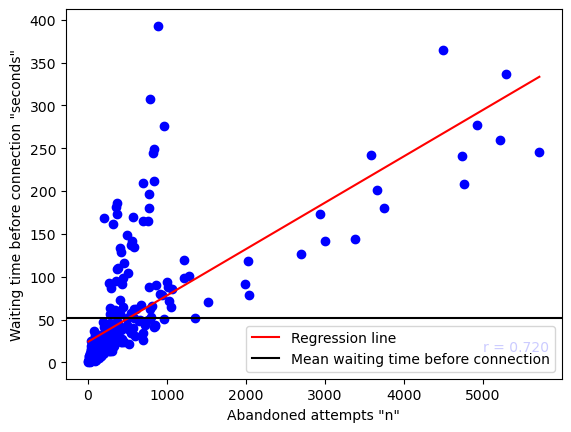

In [15]:
%run correlations_lifeline.py

<center><b>Correlation matrix on lifeline service vectors</b></center>

|	Vectors	|	Enterqueue	|	Connected calls	|	Abandoned call attempts	|	Waiting time before connection	|	Waiting time before abandonment	|	Call duration	|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|	Enterqueue	|	1	|	0.601596	|	0.96873	|	0.608984	|	0.188231	|	-0.049698	|
|	Connected calls	|	0.601596	|	1	|	0.384615	|	-0.050359	|	-0.274219	|	-0.563111	|
|	Abandoned tries	|	0.96873	|	0.384615	|	1	|	0.719634	|	0.30214	|	0.117605	|
|	Waiting time before connection	|	0.608984	|	-0.050359	|	0.719634	|	1	|	0.527604	|	0.614253	|
|	Waiting time before abandonment	|	0.188231	|	-0.274219	|	0.30214	|	0.527604	|	1	|	0.453546	|
|	Call duration	|	-0.049698	|	-0.563111	|	0.117605	|	0.614253	|	0.453546	|	1	|

<center><b>Table 7</b></center>

In [16]:
#%run correlation_matrix_lifeline.py

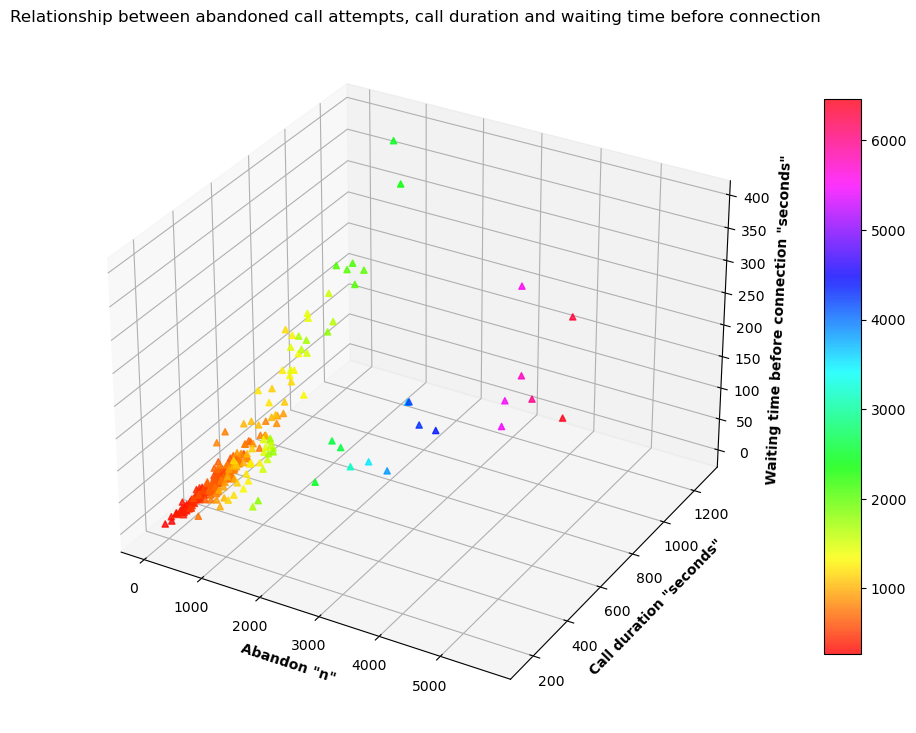

In [17]:
%run 3d_plot.py

## 2.2.5 System overload regarding the type of events

An analysis of the call duration, obtaining the mean abandonment proportion regarding the days of the corresponding quartile, shows that earthquakes produce more significant abandonment rates as the call duration increases, producing higher overload possibilities.

For the case of earthquakes, when the proportion of abandonment was equal or superior to 50% (there are more abandoned calls than connected) the subsequent changes can be seen:

- The enterqueue mean was about 963 calls on the day, with the minimum enterqueue number of 556 calls.
- The mean duration of calls is around 820 seconds, with a minimum call time of about 526 seconds.

Therefore, a possible benchmark for system overload can be suggested by considering the presence of high magnitude earthquakes and/or an enterqueue above 556 calls and/or the presence of call durations above 526 seconds.


<center><b>Quartile analysis between call duration and abandonment rates on lifeline service grouping by type of events</b></center>

|	Call duration	|	General	|	Earthquakes (10 events)	|	Measures (2 events)	|	Promotion (3 events)	|	Festivities (2 events)	|
|:-:|:-:|:-:|:-:|:-:|:-:|
|	Q1	|	16.85%	|	16.89%	|	17.09%	|	19.30%	|	12.00%	|
|	Q2	|	18.72%	|	27.76%	|	16.48%	|	19.19%	|	14.78%	|
|	Q3	|	29.82%	|	44.47%	|	23.36%	|	27.55%	|	9.20%	|
|	Q4	|	52.98%	|	60.45%	|	26.43%	|	15.76%	|	14.55%	|

<center><b>Table 8</b></center>

<center><b>Quartile analysis between enterqueue and abandonment rates on lifeline service grouping by type of events</b></center>

|	Enterqueue	|	General	|	Earthquakes (10 events)	|	Measures (2 events)	|	Promotion (3 events)	|	Festivities (2 events)	|
|:-:|:-:|:-:|:-:|:-:|:-:|
|	Q1	|	23.38%	|	22.11%	|	10.40%	|	13.52%	|	11.20%	|
|	Q2	|	25.42%	|	37.12%	|	27.46%	|	17.53%	|	12.27%	|
|	Q3	|	33.79%	|	46.43%	|	15.26%	|	20.51%	|	10.61%	|
|	Q4	|	35.94%	|	44.67%	|	30.25%	|	28.49%	|	16.45%	|

<center><b>Table 9</b></center>

## 2.3 General results for the type of events behavior across services

Looking to evaluate the effects that the different type of events produced across platforms (Screening tool for mental health problems and the Lifeline service), the mean of the percentual change and time of the different type of events was extracted once grouped, resulted on the following findings: 

- Complex events produce higher percentual changes, with extreme increases very fast (24 hours). 
- Stacked events produced very large increases, above what can produced by the events separated with delayed effects (above 40 hours).
- Earthquakes, as single events, trigger large percentual changes, mostly around 40 hours after the event.
- Festivities produced medium percentual changes around 30 hours around the event, but their effects last longer than other events along the days and can easily stack with others.

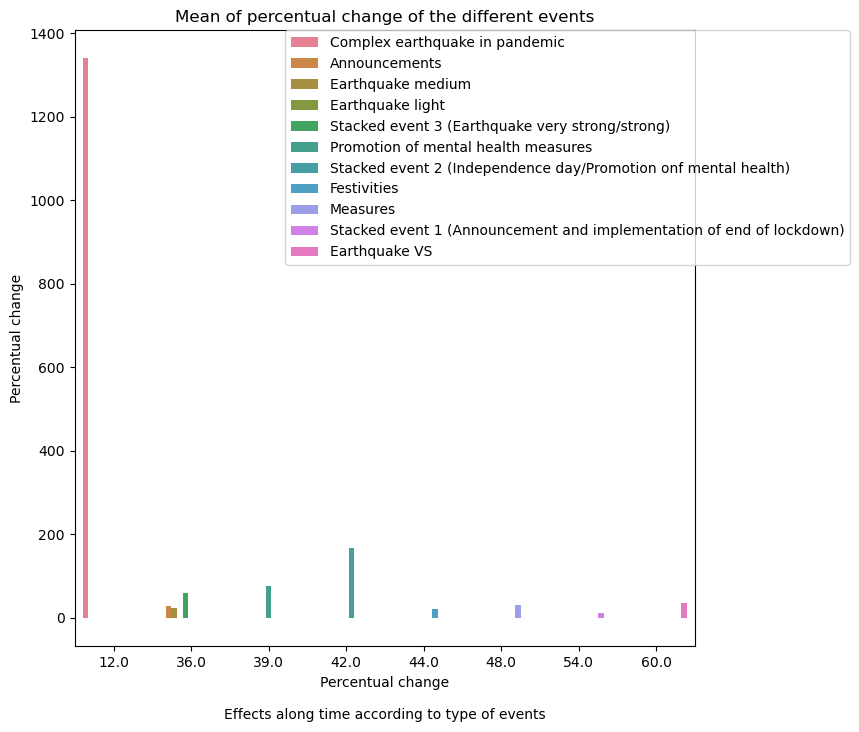

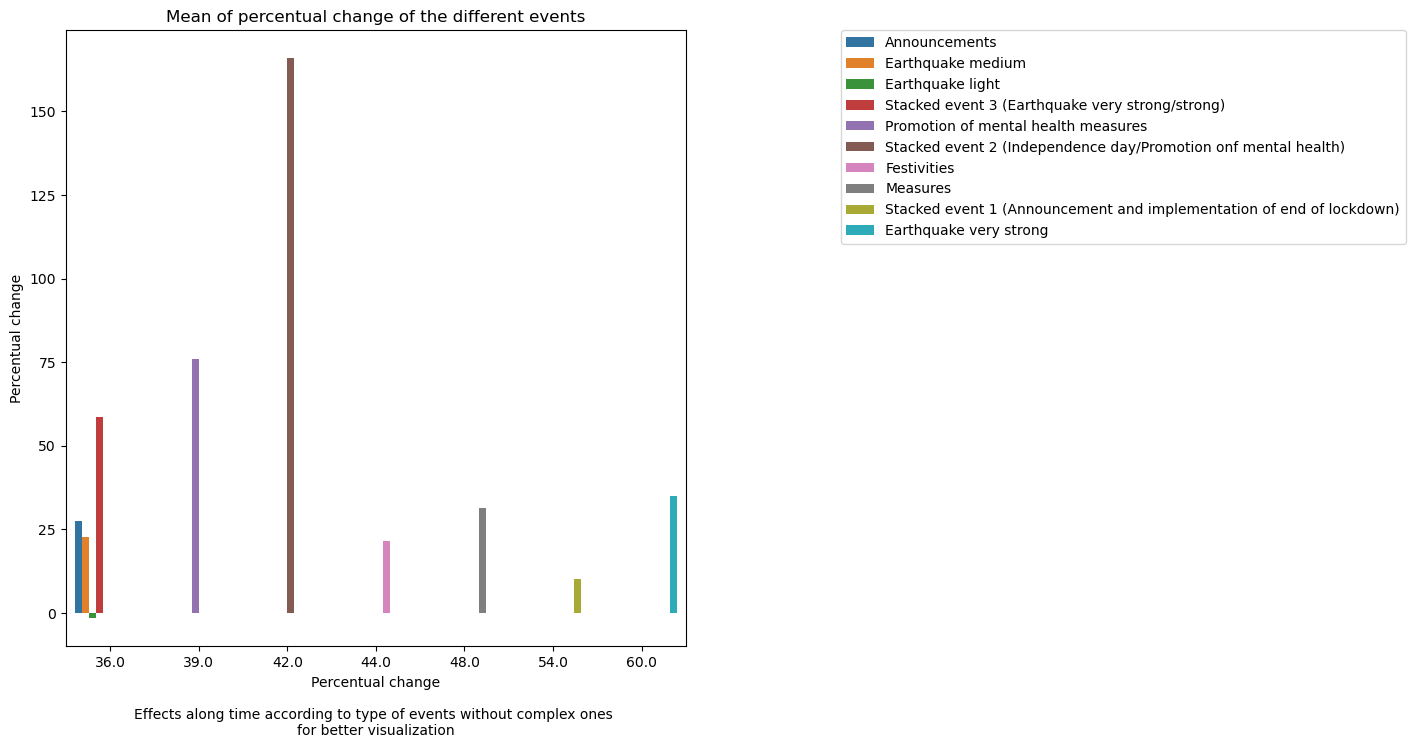

In [18]:
%run gen_res.py

# 3. Conclusions

The dataset analyzed allows us to extract several learnings:

- The assumption that different types of events trigger mental health needs in consistent patterns is supported by the results obtained in the analysis of two separate databases of first-level mental health support systems.
- There are statistically significant changes on several questions of the Screening tool for mental health problems, as well on dimensions of the lifeline service records depending on the event timeframes (ANOVA test) associated with significant events, particularly with those that can be evaluated as life-threatening like high magnitude earthquakes or disease exposure (like returning to regular activities compared to remain in lockdown).
- Earthquakes significantly affect the need for mental health support across the 72-hour window. The effects tend to appear after 48 hours, except in complex events (a very strong earthquake in the middle of the pandemic triggering a 2,651% percentual change)or stacking effects.
- Festivity days showed significant effects with late appearances (48-72 hours) across support platforms.
- There were no significant changes in the trends of responses among all the samples (Contingency analysis). Nevertheless, increases in the number of users reporting mental health symptoms increased as the number of users increased due to the events.
- It is possible to identify short-time significative changes over the time ranges of windows +- 72 hours by using changes in percentual changes as an analysis method.
- The most evident way to identify percentual changes is by comparing the mean of the -72 hours against the day with the maximum increase registered in the +72 hours.
- Most of the significant changes happened 24 hours after the event in terms of the Amount of use of the screening tool for mental health problems, while the lifeline service showed effects more distributed on the 48 to 72 hours window.
- Complex events (more than one event present) or stacking effects (two events with only some days of separation) produced higher magnitude and faster changes (24-hour window).
- The lifeline service benchmarks for system warning overload can be proposed by using identified types of events with clear mental health effects like earthquakes, as well as by using the enterqueue (n) and the duration of calls for calculation.
- The PCA allows us to see that anxiety explains the variance in the sample by much, particularly by its first item, question 54 for the Screening tool for mental health problems, while the enterqueue has the same effect for the Lifeline support service.
